## <center>Assignment 5</center>

#### <center>Gaukhar Dauzhan</center>

In [1]:
import numpy as np
import numpy.linalg as l
import matplotlib.pyplot as plt
%matplotlib inline

For different sets of data we will fit following functions <br/><b>
(a) a straight line, <br/>
(b) a power equation, <br/>
(c) a saturation-growth-rate equation,<br/>
(d) a parabola, <br/>
(e) a cubic polynomial,<br/> 
(f) the function $y = αxe^{βx}$</b> <br/>
and analyze which one fits data best

### Fit an $n^{th}$ order polynomial

Fitting a straight line, a parabola, or a cubic polynomial is a problem of determining least-squares nth order polynomial, which has a form $$ y = a_0 + a_1x + a_2x^2 + ... + a_mx^i $$
A residual of $(x_y, y_i)$, the difference between the measured value and the predicted value of a regression model, can be calculated as 
$$ e = y_i - a_0 - a_1x_i - a_2x_i^2 - a_3x_i^3 - ... - a_mx_i^m$$
The sum of the squares of the residuals is 
$$ S_r = \sum_{i=1}^{i=n} (y_i - a_0 - a_1x_i - a_2x_i^2 - ... - a_mx_i^m)^2 $$
In order to find the best approximation, we need to minimize the sum of the squares of the residuals, that is, we need to find partial derivatives with respect to coefficients $a_0, a_1, a_2, ... a_m$.
This leads to solving a linear matrix equation Ax=b, where <br/>
<center>$A_{i,j} = \sum_{l=1}^{n} x_l^{i+j}$, and $b_i = \sum_{l=1}^{n} y_lx^i_l$</center>


In [2]:
def fitPolynomial(x, y, m, n):
    A=np.zeros((m+1,m+1), float)
    b=np.zeros(m+1, float)
    for i in range (0, m+1):
        for j in range (0, i+1):
            A[i][j]=np.sum(x**(i+j))
            A[j][i]=A[i][j]
        b[i]=np.sum( np.dot( y, x**(i) ))
    return l.solve(A, b)

In [3]:
def polynomial(x, y, m, n):
    a=np.zeros(m+1, float)
    xplot = np.arange(x[0], x[n-1], 0.1)
    yplot=np.zeros(xplot.size, float)
    yest=np.zeros(n, float)
    a=fitPolynomial(x, y, m, n)
    for i in range (xplot.size):
        for j in range (m+1):
            yplot[i]+=(a[j]*xplot[i]**(j))
    for i in range (n):
        for j in range (m+1):
            yest[i]+=(a[j]*x[i]**(j))
    return xplot, yplot, yest

### Fit a power equation

A simple power equation has the following form:
$$y=\alpha x^{\beta},$$
where $\alpha$ and $\beta$ are constant coefficients.<br/>
Take log of each side:
$$log(y)=log(\alpha)+\beta*log(x)$$
Let $$\hat{y}=log(y), a_0=log(\alpha), a_1=\beta, \hat{x}=log(x)$$
Then the equation becomes
$$\hat{y}=a_0+a_1\hat{x}$$ 
Apply linear regression to get solution of AX=B - a0 and a1, and calculate coefficients $\alpha$ and $\beta$ from that:
$$\alpha=10^{a_0}\\
\beta=a_1$$

In [4]:
def powerFunction(x, y, m, n):
    a=fitPolynomial(np.log10(x), np.log10(y), 1, n)
    a[0]=10**a[0]
    yest=np.zeros(n, float)
    yest=a[0]*x**a[1]
    xplot = np.arange(x[0], x[n-1], 0.01)
    yplot=a[0]*xplot**a[1]
    return xplot, yplot, yest

### Fit a saturation-growth-rate equation
A saturation-growth-rate equation has the following form:
$$y = \frac{\alpha x}{\beta+x}$$
Take inverse of each side:
$$\frac{1}{y}=\frac{1}{\alpha}*(\frac{\beta}{x} +1) $$
Let $$\hat{y}=\frac{1}{y}, \hat{x}=\frac{1}{x}, a_0=\frac{1}{\alpha}, a1=\frac{\beta}{\alpha}$$
Then equation becomes
$$\hat{y}=a_0+a_1\hat{x}$$
Apply linear regression to get solution of AX=B - a0 and a1, and calculate coefficients $\alpha$ and $\beta$ from that: 
$$\alpha=\frac{1}{a_0}\\
\beta=\alpha*a_1$$

In [5]:
def satFunction(x, y, m, n):
    a=fitPolynomial(1/x, 1/y, 1, n)
    a[0]=1/a[0]
    a[1]=a[0]*a[1]
    yest=np.zeros(n, float)
    yest=a[0]*x/(a[1]+x)
    xplot = np.arange(x[0], x[n-1], 0.01)
    yplot=a[0]*xplot/(a[1]+xplot)
    return xplot, yplot, yest
        

### Fit a function of the form $y=αxe^{βxy}$

$$y=\alpha xe^{\beta x}$$
Take log of each side
$$ln(y)=ln(\alpha)+ln(x)+\beta x$$
$$Let \hat{y}=ln(y)-ln(x), a_0=ln(\alpha), a_1=\beta$$
Then equation becomes $$\hat{y}=a_0+a_1x$$
Apply linear regression to get solution of AX=B - a0 and a1, and calculate coefficients $\alpha$ and $\beta$ from that:
$$\alpha=exp^{a_0}$$
$$\beta=a_1$$

In [6]:
def expFunction(x, y, m, n):
    a=fitPolynomial(x, np.log(y)-np.log(x), 1, n)
    a[0]=np.exp(a[0])
    yest=np.zeros(n, float)
    yest= a[0]*x*np.exp(a[1]*x)
    xplot = np.arange(x[0], x[n-1], 0.01)
    yplot= a[0]*xplot*np.exp(a[1]*xplot)
    return xplot, yplot, yest

In [7]:
fnum=6
orders=np.array([1, 1, 1, 2, 3, 1])
functions=np.array([polynomial, powerFunction, satFunction, polynomial, polynomial, expFunction])
fnames=(["Straight line",  "A power function", "A saturation-growth-rate function", "A parabola", "A cubic polynomial", "A function y = axe^(bx)"])

#### Function for plotting graphs

In [8]:
def plotFunction(x, y, m, n, function, fname, i):
    plt.subplot(i)
    plt.scatter(x, y)
    xplot, yplot, yest = function(x, y, m, n)
    plt.plot(xplot, yplot)
    plt.title(fname)
    plt.xlabel("x")
    plt.ylabel("y")
    return yest

#### Functions for calculating deviation and plotting a deviation bar graph

In [9]:
def deviation (y, yest, n, m):
    return np.sqrt(np.sum(np.square(y-yest))/(n-m-1));

In [10]:
def plotDeviation(y, yest, n, m, fnum, fnames):
    x=np.arange(fnum)
    stDev=np.zeros(fnum, float)
    for i in range (fnum):
        stDev[i]=deviation(y, yest[i], n, orders[i])
    yave=np.average(y)
    ave=deviation(y, yave, n, 0)
    above_ave=np.maximum(stDev-ave, 0)
    below_ave=np.minimum(stDev, ave)
    fig, ax=plt.subplots()
    ax.bar(x, below_ave, 0.35, color="g")
    ax.bar(x, above_ave, 0.35, color="r", bottom=below_ave)
    plt.xticks(x, fnames, rotation = 45)
    ax.plot([0, len(x)], [ave, ave], "k--")
    plt.title("Standart deviation from function")
    plt.legend(["Deviation from average"])
    plt.ylabel("Deviation")
    plt.show()

## Part 1

In [11]:
x1=np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
y1=np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])
n1=9
a=np.zeros(2, float)

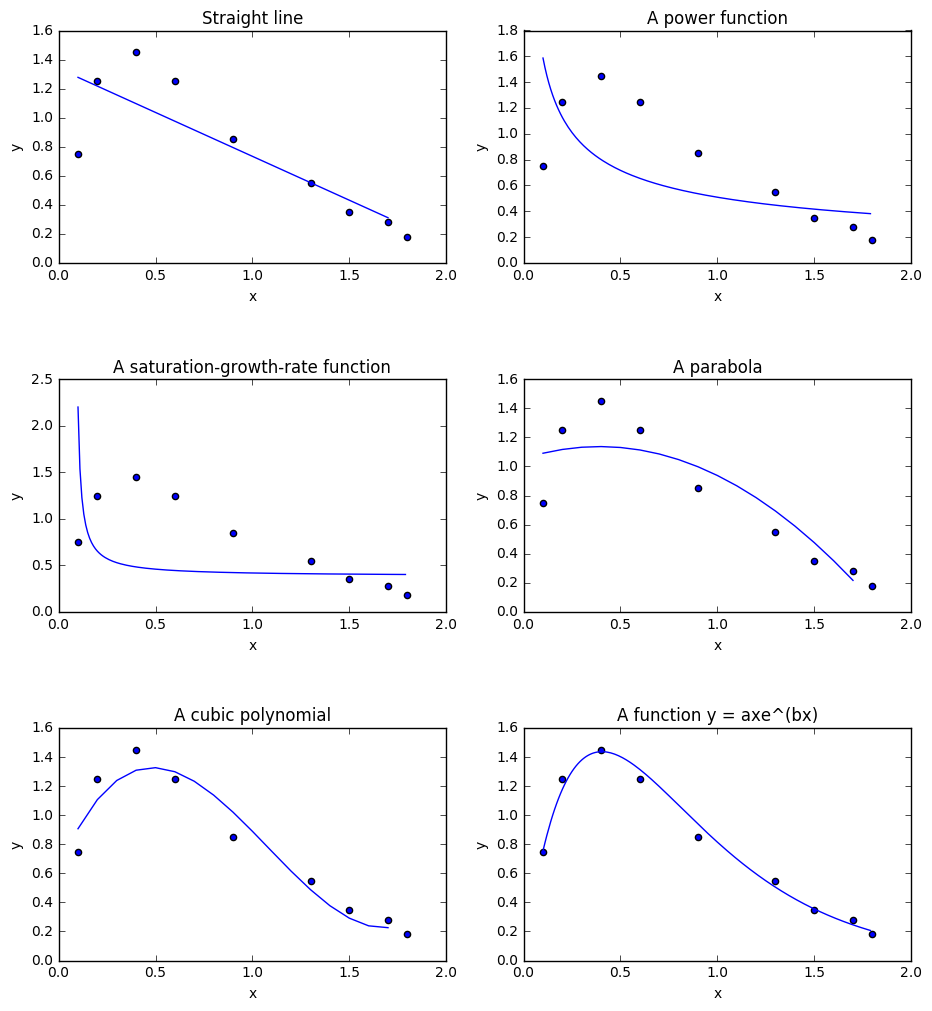

In [12]:
yest1=np.zeros((fnum, n1), float)
plt.figure(figsize=(11,12))
plt.subplots_adjust(hspace=.5)
for i in range (fnum):
    yest1[i]=plotFunction(x1, y1, orders[i], n1, functions[i], fnames[i], 321+i)
plt.show()

From the graphs it can be seen that a function of the form $y=\alpha x e^\beta x$ fits the data best, while a <i>saturation-growth-rate function</i> and a <i>power function</i> show the worst results. This can be verified mathematically by comparing standart deviations of data points from curve functions with each other and with respect to average y of the points (the simplest model).

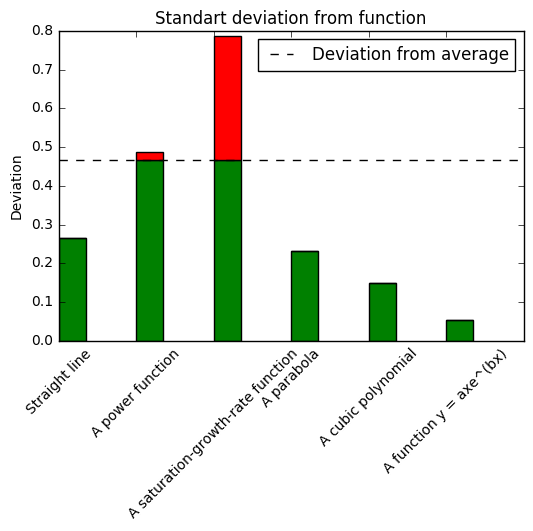

In [13]:
plotDeviation(y1, yest1, n1, orders, fnum, fnames)
    

The graph confirms visually predicted assessment and shows that a saturation-growth-rate equation and a power equation fit data worse than average y

## Part2

In [14]:
x2=np.array([0.75, 2, 3, 4, 6, 8, 8.5])
y2=np.array([1.2, 1.95, 2, 2.4, 2.4, 2.7, 2.6])
n2=7

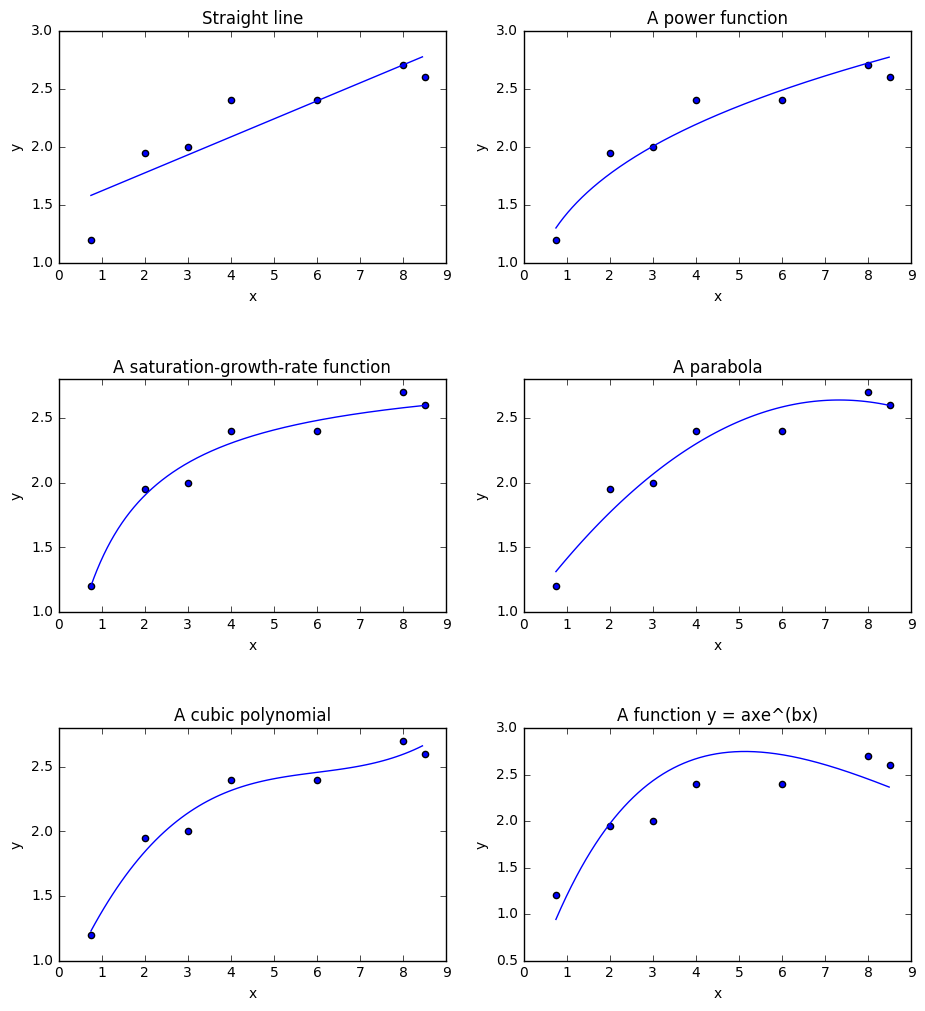

In [15]:
yest2=np.zeros((fnum, n2), float)
plt.figure(figsize=(11,12))
plt.subplots_adjust(hspace=.5)
for i in range (fnum):
    yest2[i]=plotFunction(x2, y2, orders[i], n2, functions[i], fnames[i], 321+i)

From the graphs it can be seen that a <i>saturation-growth-rate function</i> and a <i>cubic polynomial</i>  fit the data best, while a function of the form $y=\alpha x e^\beta x$ and a <i>straight line</i> do not fit very well. This can be verified mathematically by comparing standart deviations of data points from curve functions with each other and with respect to average y of the points.

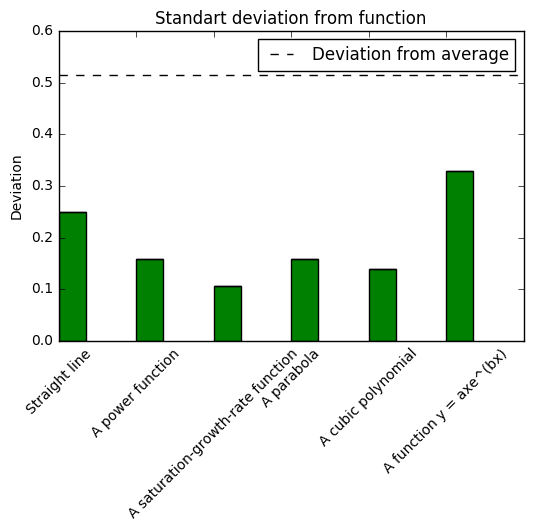

In [16]:
plotDeviation(y2, yest2, n2, orders, fnum, fnames)

The graph confirms visually predicted assessment and shows that deviations from all of the curves are less than the deviation from average y of the points. 

<b>Thus, linear least squares method can be used in order to fit a function to data. Different functions can show different performance in terms of fitting the data depending on the data itself, and their quality can be assessed visually and by calculating standart deviations (one of the possible values to compare). The best fitted functions can be used to analyze data and predict unobserved values.</b>